### PROBLEM BACKGROUND

Build a model that can predict credit risk using a data set provided by the company consisting of credit accepted and rejected data. In addition, you also need to prepare visual media to present solutions to clients. Make sure the visual media you create is clear, easy to read, and communicative. Work on this end-to-end solution can be done in the Programming Language of your choice while still referring to the Data Science framework/methodology.

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from warnings import filterwarnings
filterwarnings("ignore")

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

## DATA PREPARATION

##### Data Overview

In [2]:
loandata= pd.read_csv("loan_data_2007_2014.csv", index_col=[0])
loandata.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

as we can see we have 3 data type int, float and object

In [4]:
loandata.shape

(466285, 74)

we have 466285 rows and 74 columns

In [5]:
loandata.shape

(466285, 74)

In [6]:
loandata.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


In [7]:
loandata.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

## Data Cleaning

In [8]:
#checking missing valuesl
loandata.isna().sum()/loandata.shape[0]*100

id                    0.000000
member_id             0.000000
loan_amnt             0.000000
funded_amnt           0.000000
funded_amnt_inv       0.000000
                       ...    
all_util            100.000000
total_rev_hi_lim     15.071469
inq_fi              100.000000
total_cu_tl         100.000000
inq_last_12m        100.000000
Length: 74, dtype: float64

In [9]:
loandata.isnull().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 74, dtype: int64

In [10]:
#checking duplicate 
loandata.duplicated().any()

False

### Make new dataframe with loan dataframe copy

In [11]:
ld = loandata.copy()

In [12]:
#check misssing values
ld.isnull().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 74, dtype: int64

In [13]:
ld.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
ld.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [15]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

#### Menghapus kolom kolom yang sudah jelas memiliki 0 values

In [16]:
ld.drop(['annual_inc_joint', 'dti_joint', 'verification_status_joint','open_acc_6m',
       'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util','inq_fi', 'total_cu_tl',
       'inq_last_12m'], axis = 1, inplace = True)

Bisa kita lihat jika kolom dibawah ini yang sudah tidak ada 0 values meskipun masih banyak missing values

In [17]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [18]:
ld.isna().sum()/ld.shape[0]*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
term                            0.000000
int_rate                        0.000000
installment                     0.000000
grade                           0.000000
sub_grade                       0.000000
emp_title                       5.916553
emp_length                      4.505399
home_ownership                  0.000000
annual_inc                      0.000858
verification_status             0.000000
issue_d                         0.000000
loan_status                     0.000000
pymnt_plan                      0.000000
url                             0.000000
desc                           72.981546
purpose                         0.000000
title                           0.004289
zip_code                        0.000000
addr_state                      0.000000
dti             

In [19]:
# dropping the rows having NaN values
ld = ld.dropna()
 
# To reset the indices
ld = ld.reset_index(drop = True)

In [20]:
ld.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,10089537,11941075,7500,7500,7500.0,36 months,11.99,249.08,B,B3,...,Feb-16,Jan-16,0.0,34.0,1,INDIVIDUAL,0.0,0.0,74029.0,10200.0
1,10159240,12010878,16000,16000,16000.0,60 months,19.22,416.99,D,D4,...,Feb-16,Jan-16,0.0,60.0,1,INDIVIDUAL,0.0,0.0,188654.0,22600.0
2,10159217,12010856,14125,14125,14125.0,60 months,19.22,368.13,D,D4,...,Feb-16,Jan-16,0.0,50.0,1,INDIVIDUAL,0.0,0.0,164310.0,12900.0


In [21]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           861 non-null    int64  
 1   member_id                    861 non-null    int64  
 2   loan_amnt                    861 non-null    int64  
 3   funded_amnt                  861 non-null    int64  
 4   funded_amnt_inv              861 non-null    float64
 5   term                         861 non-null    object 
 6   int_rate                     861 non-null    float64
 7   installment                  861 non-null    float64
 8   grade                        861 non-null    object 
 9   sub_grade                    861 non-null    object 
 10  emp_title                    861 non-null    object 
 11  emp_length                   861 non-null    object 
 12  home_ownership               861 non-null    object 
 13  annual_inc          

bisa kita lihat disini jika data terdapat 861 rows dan 57 columns

In [22]:
ld.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
url                            0
desc                           0
purpose                        0
title                          0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc  

jika kita lihat disini data sudah bersih dari missing values

In [23]:
ld.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,10089537,11941075,7500,7500,7500.0,36 months,11.99,249.08,B,B3,...,Feb-16,Jan-16,0.0,34.0,1,INDIVIDUAL,0.0,0.0,74029.0,10200.0
1,10159240,12010878,16000,16000,16000.0,60 months,19.22,416.99,D,D4,...,Feb-16,Jan-16,0.0,60.0,1,INDIVIDUAL,0.0,0.0,188654.0,22600.0
2,10159217,12010856,14125,14125,14125.0,60 months,19.22,368.13,D,D4,...,Feb-16,Jan-16,0.0,50.0,1,INDIVIDUAL,0.0,0.0,164310.0,12900.0
3,9847366,11699256,12000,12000,12000.0,36 months,13.53,407.40,B,B5,...,Feb-16,Jan-16,0.0,58.0,1,INDIVIDUAL,0.0,0.0,222335.0,9800.0
4,8978364,10780341,15600,15600,15600.0,36 months,8.90,495.36,A,A5,...,Feb-16,Jan-16,0.0,40.0,1,INDIVIDUAL,0.0,0.0,90719.0,21200.0


In [24]:
cols_with_na = [col for col in ld.columns if ld[col].isna().any()]
cols_with_na

[]

In [25]:
ld.drop(['acc_now_delinq','tot_coll_amt','collections_12_mths_ex_med','collection_recovery_fee','policy_code','recoveries'], axis = 1, inplace = True)

In [26]:
ld.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,mths_since_last_major_derog,application_type,tot_cur_bal,total_rev_hi_lim
0,10089537,11941075,7500,7500,7500.0,36 months,11.99,249.08,B,B3,...,1281.15,0.0,Jan-16,249.08,Feb-16,Jan-16,34.0,INDIVIDUAL,74029.0,10200.0
1,10159240,12010878,16000,16000,16000.0,60 months,19.22,416.99,D,D4,...,4585.51,0.0,Sep-15,416.99,Feb-16,Jan-16,60.0,INDIVIDUAL,188654.0,22600.0
2,10159217,12010856,14125,14125,14125.0,60 months,19.22,368.13,D,D4,...,4721.72,0.0,Jan-16,368.13,Feb-16,Jan-16,50.0,INDIVIDUAL,164310.0,12900.0


<AxesSubplot:>

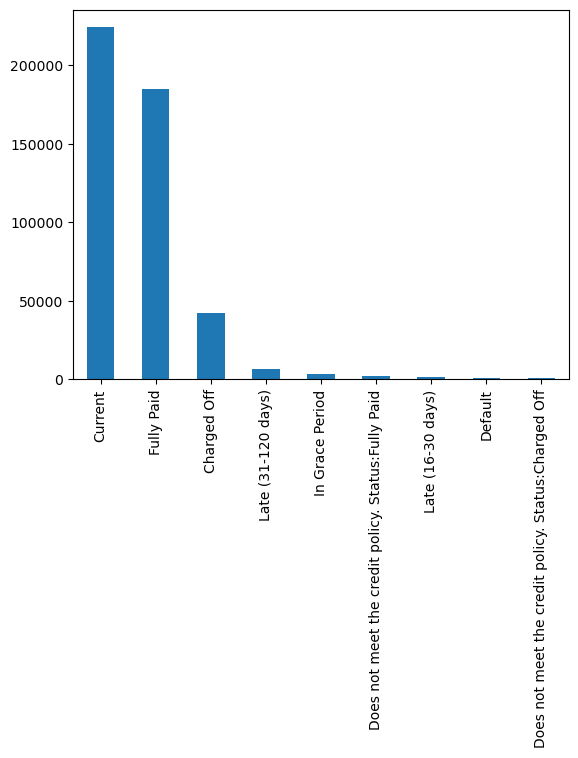

In [27]:
loandata['loan_status'].value_counts().plot.bar()

sekarang kolom nya menjadi 53 dengan 831 baris

### EXPLORATION DATA ANALYSIS (EDA)

**For now we use the ld dataframe and the target variable is loan_status**

**loan_amount**

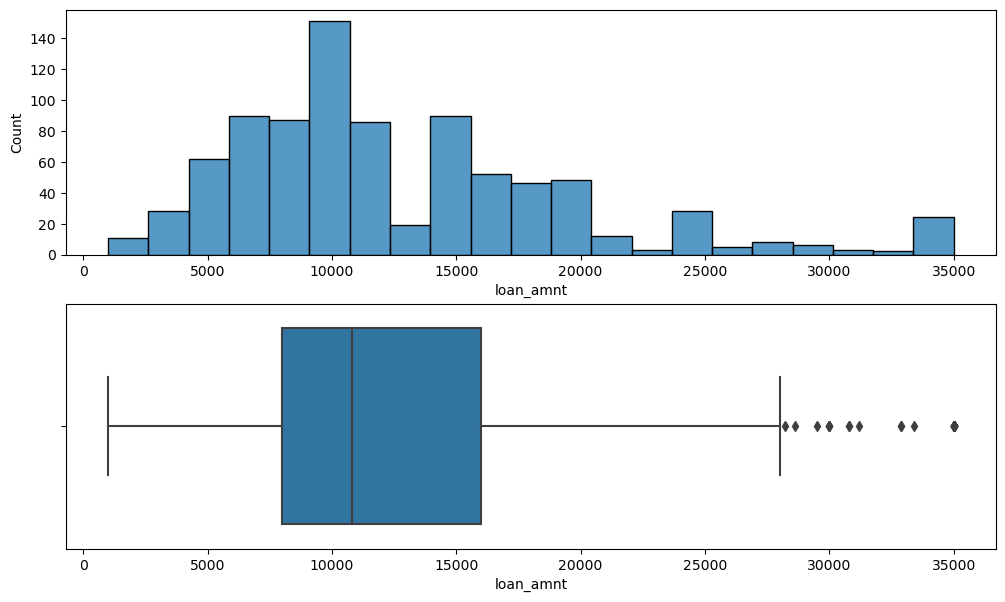

In [28]:
fig, ax = plt.subplots(2, 1, figsize=(12,7))
sns.histplot(ld['loan_amnt'], ax=ax[0])
sns.boxplot(ld['loan_amnt'], ax=ax[1])
plt.show()

disini bisa kita lihat jika terdapat outlier dan terdapat right skew

**loan_status distribution**

In [29]:
ld['loan_status'].value_counts()

Current               812
Late (31-120 days)     27
In Grace Period        14
Late (16-30 days)       5
Default                 3
Name: loan_status, dtype: int64

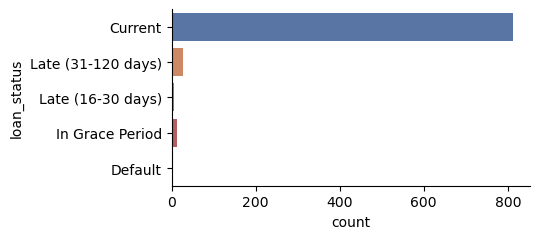

In [30]:
# Plot loan_status
sns.catplot(y='loan_status', kind='count', data=ld, height=2.5, aspect=2.2, palette = 'deep')

In [31]:
ld.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,mths_since_last_major_derog,application_type,tot_cur_bal,total_rev_hi_lim
856,10234592,12096743,10000,10000,10000.0,36 months,7.90,312.91,A,A4,...,1108.62,0.0,Jan-16,312.91,Feb-16,Jan-16,9.0,INDIVIDUAL,11920.0,35700.0
857,10068481,11920178,14000,14000,14000.0,36 months,13.53,475.30,B,B5,...,2713.79,0.0,Jan-16,475.30,Feb-16,Jan-16,37.0,INDIVIDUAL,335969.0,15900.0
858,10084778,11936913,7300,7300,7300.0,36 months,15.61,255.25,C,C4,...,1644.70,0.0,Jan-16,255.25,Feb-16,Jan-16,47.0,INDIVIDUAL,93025.0,7500.0
859,9795421,11647496,21000,21000,21000.0,60 months,20.50,562.24,E,E1,...,3002.71,0.0,Jan-16,562.24,Feb-16,Jan-16,50.0,INDIVIDUAL,426640.0,11800.0
860,9666300,9890240,10000,10000,10000.0,36 months,11.99,332.10,B,B3,...,1658.63,0.0,Jan-16,332.10,Feb-16,Jan-16,22.0,INDIVIDUAL,9557.0,17100.0


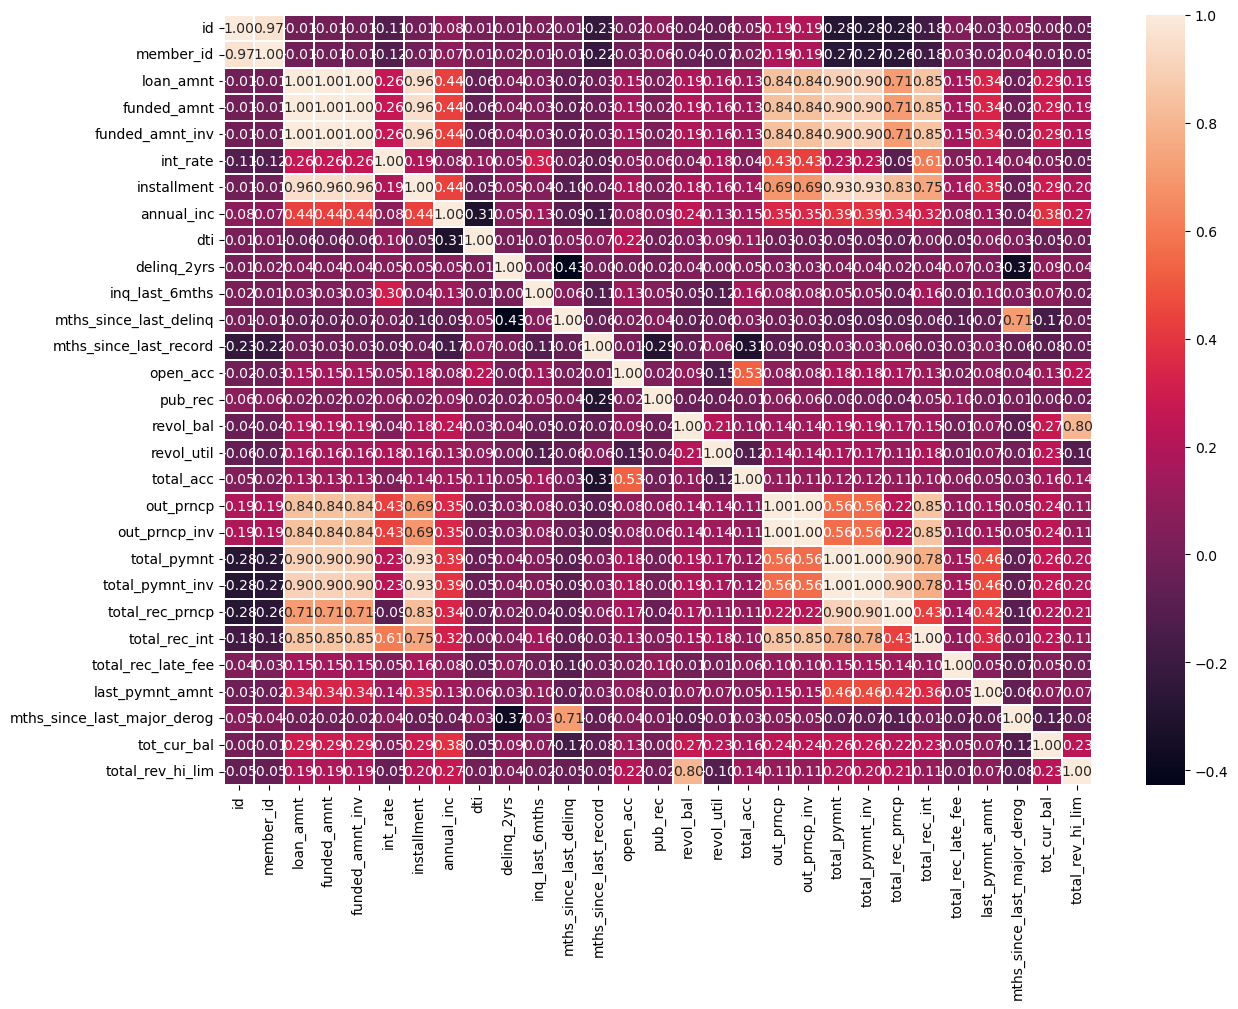

In [32]:
plt.figure(figsize=(14,10))
sns.heatmap(ld.corr(), annot=True, linewidths=.3, fmt= '.2f')
plt.show()

<AxesSubplot:xlabel='loan_amnt', ylabel='loan_status'>

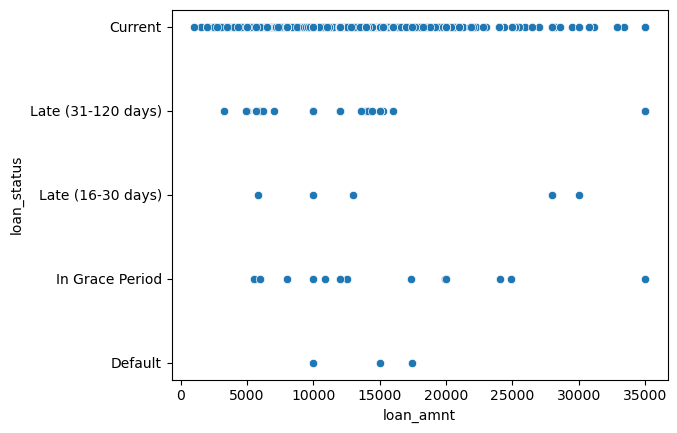

In [33]:
sns.scatterplot(x='loan_amnt',y='loan_status',data=ld)

In [34]:
print(pd.crosstab(ld['loan_amnt'],ld['loan_status']))

loan_status  Current  Default  In Grace Period  Late (16-30 days)  \
loan_amnt                                                           
1000               1        0                0                  0   
1500               2        0                0                  0   
2000               3        0                0                  0   
2100               1        0                0                  0   
2450               1        0                0                  0   
...              ...      ...              ...                ...   
30800              2        0                0                  0   
31175              1        0                0                  0   
32875              2        0                0                  0   
33425              1        0                0                  0   
35000             20        0                1                  0   

loan_status  Late (31-120 days)  
loan_amnt                        
1000                          0  


In [35]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           861 non-null    int64  
 1   member_id                    861 non-null    int64  
 2   loan_amnt                    861 non-null    int64  
 3   funded_amnt                  861 non-null    int64  
 4   funded_amnt_inv              861 non-null    float64
 5   term                         861 non-null    object 
 6   int_rate                     861 non-null    float64
 7   installment                  861 non-null    float64
 8   grade                        861 non-null    object 
 9   sub_grade                    861 non-null    object 
 10  emp_title                    861 non-null    object 
 11  emp_length                   861 non-null    object 
 12  home_ownership               861 non-null    object 
 13  annual_inc          

In [36]:
ld['last_pymnt_d'].value_counts()

Jan-16    625
Dec-15    211
Oct-15     11
Sep-15      6
Nov-15      6
Aug-15      2
Name: last_pymnt_d, dtype: int64

Text(0.5, 1.0, 'verification_status')

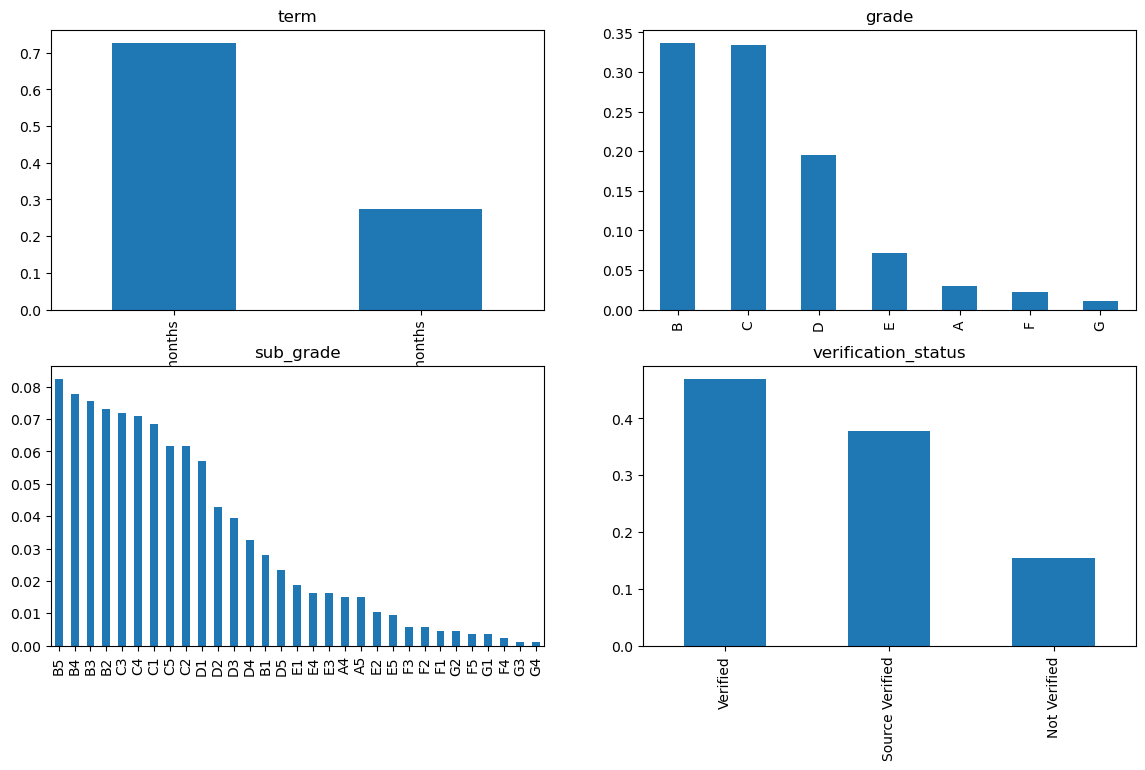

In [37]:
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(14,8))

ld['term'].value_counts(normalize=True).plot.bar(ax=ax[0][0])
ax[0][0].set_title('term')

ld['grade'].value_counts(normalize=True).plot.bar(ax=ax[0][1])
ax[0][1].set_title('grade')

ld['sub_grade'].value_counts(normalize=True).plot.bar(ax=ax[1][0])
ax[1][0].set_title('sub_grade')

ld['verification_status'].value_counts(normalize=True).plot.bar(ax=ax[1][1])
ax[1][1].set_title('verification_status')

Text(0.5, 1.0, 'purpose')

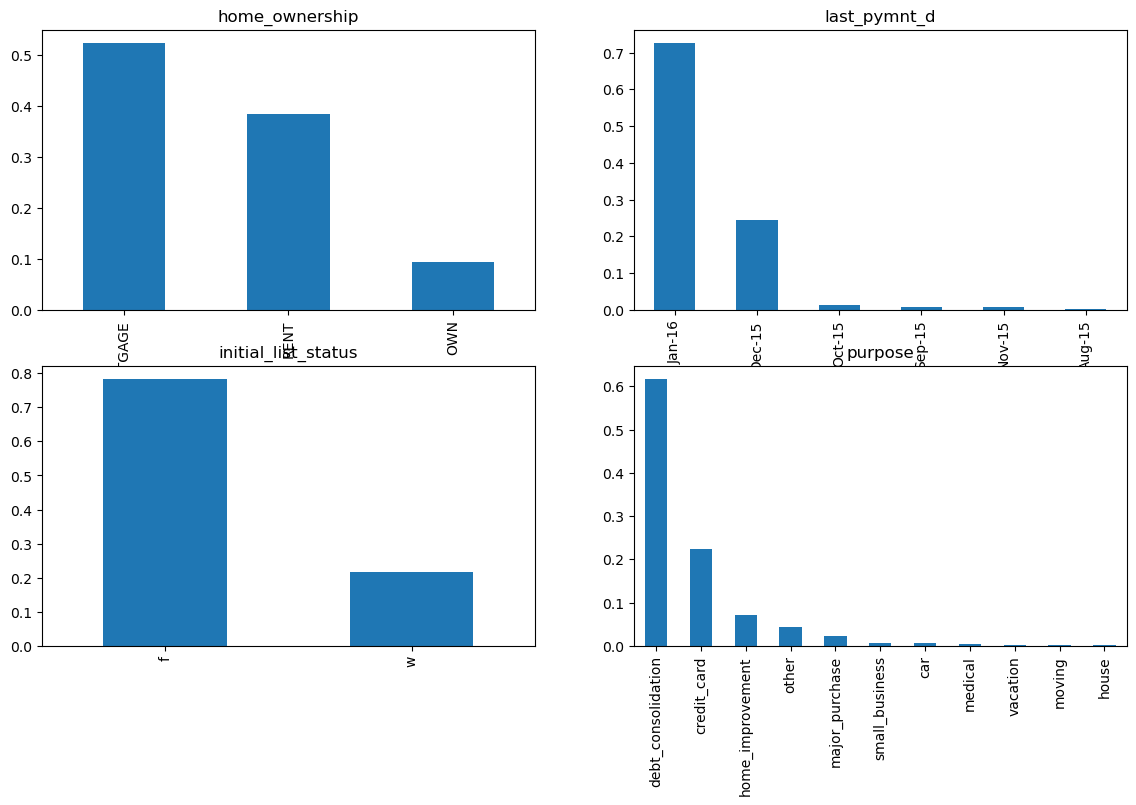

In [38]:
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(14,8))

ld['home_ownership'].value_counts(normalize=True).plot.bar(ax=ax[0][0])
ax[0][0].set_title('home_ownership')

ld['last_pymnt_d'].value_counts(normalize=True).plot.bar(ax=ax[0][1])
ax[0][1].set_title('last_pymnt_d')

ld['initial_list_status'].value_counts(normalize=True).plot.bar(ax=ax[1][0])
ax[1][0].set_title('initial_list_status')

ld['purpose'].value_counts(normalize=True).plot.bar(ax=ax[1][1])
ax[1][1].set_title('purpose')

In [39]:
ld.describe(include = ['O'])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,861,861,861,861,861,861,861,861,861,861,...,861,861,861,861,861,861,861,861,861,861
unique,2,7,31,763,11,3,3,19,5,1,...,11,265,391,43,317,2,6,2,5,1
top,36 months,B,B5,Manager,10+ years,MORTGAGE,Verified,Feb-14,Current,n,...,debt_consolidation,Debt consolidation,070xx,CA,Oct-95,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL
freq,626,290,71,11,343,450,404,164,812,861,...,531,293,13,126,10,674,625,731,857,861


<AxesSubplot:xlabel='verification_status'>

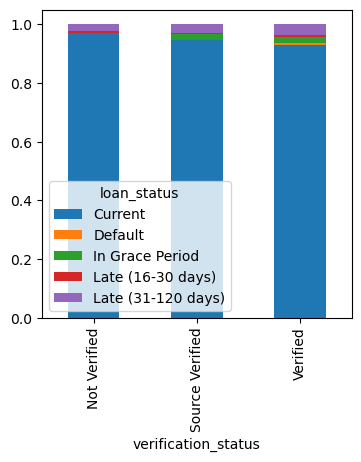

In [40]:
verification_status = pd.crosstab(ld['verification_status'],ld['loan_status'])
verification_status.div(verification_status.sum(1).astype(float),axis=0).plot(kind='bar',stacked = True,
figsize=(4,4))

<AxesSubplot:xlabel='purpose'>

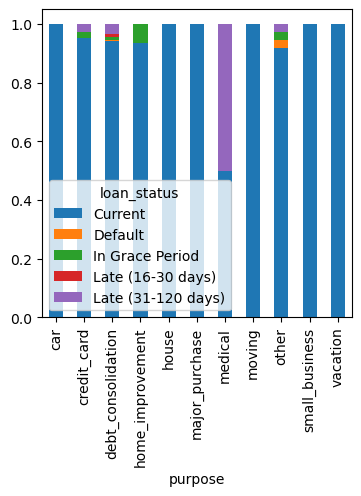

In [41]:
purpose = pd.crosstab(ld['purpose'],ld['loan_status'])
purpose.div(purpose.sum(1).astype(float),axis=0).plot(kind='bar',stacked = True,
figsize=(4,4))

In [42]:
ld['emp_title']

0                      Engineer
1        District Sales Manager
2         Field Account Manager
3            Network Technician
4      Bioinformatics Scientist
                 ...           
856                      driver
857        Psychiatric screener
858      Development Specialist
859         Director of Finance
860                  Accountant
Name: emp_title, Length: 861, dtype: object

# Data Preprocessing

### Convert All To Numeric

In [43]:
ld.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'mths_since_last_major_derog', 'application_type', 'tot_cur_bal',
       'total_rev_hi_lim'],
      dtype='object')

In [44]:
ld['loan_status'].replace('Default',0, inplace=True)
ld['loan_status'].replace('Current',1, inplace=True)
ld['loan_status'].replace('Late (16-30 days)', 2, inplace=True)
ld['loan_status'].replace('In Grace Period',3, inplace=True)
ld['loan_status'].replace('Late (31-120 days)',4, inplace=True)

In [45]:
ld['loan_status'].value_counts()

1    812
4     27
3     14
2      5
0      3
Name: loan_status, dtype: int64

In [46]:
ld.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,mths_since_last_major_derog,tot_cur_bal,total_rev_hi_lim
id,1.000000,0.965716,-0.014744,-0.014744,-0.014865,-0.114858,-0.011555,0.076571,0.030370,0.013055,...,0.194714,-0.279255,-0.279354,-0.279274,-0.177261,0.037723,-0.028298,0.053844,0.002189,-0.052418
member_id,0.965716,1.000000,-0.013016,-0.013016,-0.013136,-0.122128,-0.009553,0.069312,0.022859,0.014242,...,0.185090,-0.268145,-0.268241,-0.263676,-0.176754,0.029206,-0.023784,0.041272,-0.014834,-0.050305
loan_amnt,-0.014744,-0.013016,1.000000,1.000000,0.999995,0.258771,0.955016,0.436070,0.014886,-0.057373,...,0.841294,0.903700,0.903607,0.712989,0.851961,0.150959,0.340511,-0.020356,0.294580,0.194781
funded_amnt,-0.014744,-0.013016,1.000000,1.000000,0.999995,0.258771,0.955016,0.436070,0.014886,-0.057373,...,0.841294,0.903700,0.903607,0.712989,0.851961,0.150959,0.340511,-0.020356,0.294580,0.194781
funded_amnt_inv,-0.014865,-0.013136,0.999995,0.999995,1.000000,0.259164,0.955052,0.436085,0.014909,-0.057254,...,0.841299,0.903766,0.903682,0.712981,0.852112,0.151012,0.340600,-0.020337,0.294668,0.194810
int_rate,-0.114858,-0.122128,0.258771,0.258771,0.259164,1.000000,0.193385,0.075999,0.080673,0.095977,...,0.427642,0.229720,0.230088,-0.087501,0.609325,0.046884,0.144926,0.043190,0.047495,-0.045121
installment,-0.011555,-0.009553,0.955016,0.955016,0.955052,0.193385,1.000000,0.438364,0.013308,-0.054435,...,0.690602,0.933964,0.933926,0.827330,0.748273,0.158573,0.352078,-0.047007,0.291656,0.195927
annual_inc,0.076571,0.069312,0.436070,0.436070,0.436085,0.075999,0.438364,1.000000,-0.004117,-0.309770,...,0.346909,0.387435,0.387410,0.336804,0.319721,0.083953,0.134723,-0.035935,0.383830,0.270846
loan_status,0.030370,0.022859,0.014886,0.014886,0.014909,0.080673,0.013308,-0.004117,1.000000,-0.030201,...,0.039198,-0.010663,-0.010623,-0.023995,0.012321,0.219899,0.004187,0.027739,0.019023,-0.016107
dti,0.013055,0.014242,-0.057373,-0.057373,-0.057254,0.095977,-0.054435,-0.309770,-0.030201,1.000000,...,-0.027004,-0.046231,-0.046103,-0.068398,0.003156,-0.054533,0.055852,0.033655,-0.047442,-0.013626


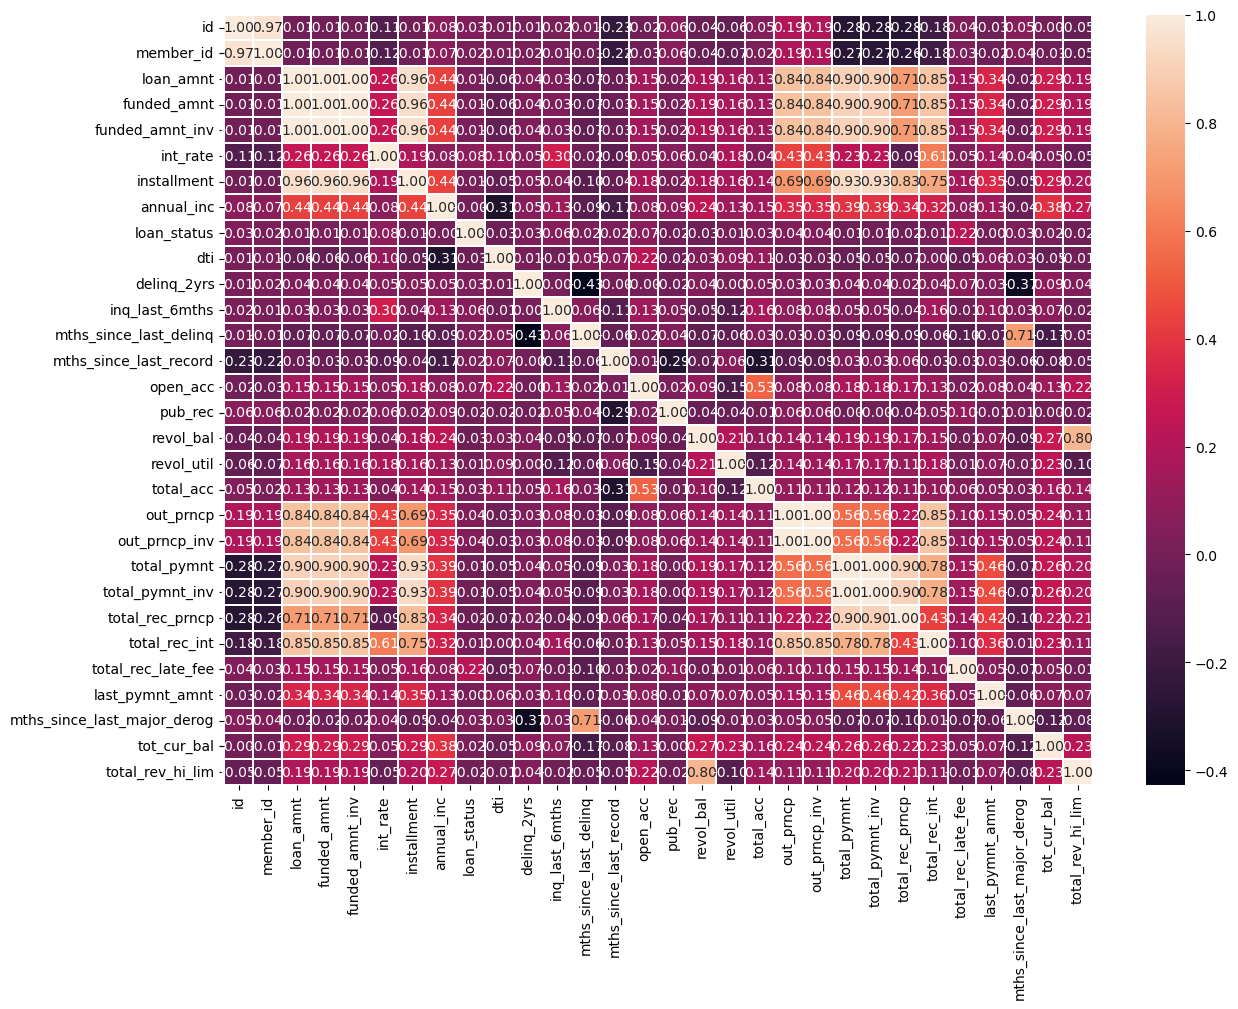

In [47]:
plt.figure(figsize=(14,10))
sns.heatmap(ld.corr(), annot=True, linewidths=.3, fmt= '.2f')
plt.show()

In [48]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           861 non-null    int64  
 1   member_id                    861 non-null    int64  
 2   loan_amnt                    861 non-null    int64  
 3   funded_amnt                  861 non-null    int64  
 4   funded_amnt_inv              861 non-null    float64
 5   term                         861 non-null    object 
 6   int_rate                     861 non-null    float64
 7   installment                  861 non-null    float64
 8   grade                        861 non-null    object 
 9   sub_grade                    861 non-null    object 
 10  emp_title                    861 non-null    object 
 11  emp_length                   861 non-null    object 
 12  home_ownership               861 non-null    object 
 13  annual_inc          

In [49]:
ld = ld.drop(['url', 'desc', 'zip_code',
       'emp_title', 'emp_title','title'], axis = 1)

In [50]:
ld.shape

(861, 46)

### Menentukan ```target``` dan ```features```

#### loan_status sebagai ```target```

In [51]:
ld.dropna(axis=0, subset=['loan_status'], inplace=True)
ld.shape

(861, 46)

In [52]:
y = ld['loan_status']
y.head()

0    1
1    4
2    1
3    1
4    1
Name: loan_status, dtype: int64

#### Hanya kolom numerik yang disertakan sebagai ```features```

In [53]:
X = ld.drop(['loan_status'], axis=1)
X = X.select_dtypes(exclude=['object'])
X.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,mths_since_last_major_derog,tot_cur_bal,total_rev_hi_lim
0,10089537,11941075,7500,7500,7500.0,11.99,249.08,59600.0,15.93,0.0,...,2803.27,5977.88,5977.88,4696.73,1281.15,0.0,249.08,34.0,74029.0,10200.0
1,10159240,12010878,16000,16000,16000.0,19.22,416.99,105000.0,20.35,1.0,...,12246.26,8339.25,8339.25,3753.74,4585.51,0.0,416.99,60.0,188654.0,22600.0
2,10159217,12010856,14125,14125,14125.0,19.22,368.13,55000.0,20.65,0.0,...,10012.23,8834.49,8834.49,4112.77,4721.72,0.0,368.13,50.0,164310.0,12900.0
3,9847366,11699256,12000,12000,12000.0,13.53,407.40,70000.0,20.61,4.0,...,4550.33,9777.60,9777.60,7449.67,2327.93,0.0,407.40,58.0,222335.0,9800.0
4,8978364,10780341,15600,15600,15600.0,8.90,495.36,60000.0,15.88,0.0,...,5667.17,11914.24,11914.24,9932.83,1981.41,0.0,495.36,40.0,90719.0,21200.0


# MODEL BUILDING

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

ModuleNotFoundError: No module named 'xgboost'

## Building Machine Learning Model

### Stochastic Gradient Descent (SGD):

In [ ]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, y_train)

acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)

### Random Forest

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

### Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)

### K Nearest Neighbor:

In [ ]:
# KNN 
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

### Gaussian Naive Bayes:

In [ ]:
gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

### Linear Support Vector Machine:

In [ ]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

### Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

### XGboost

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_xgb = round(xgb.score(X_train, y_train) * 100, 2)

### LGBM

In [ ]:
lgb = LGBMClassifier()
lgb.fit(X_train, y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_lgb= round(lgb.score(X_train, y_train) * 100, 2)

### Which is the best model ?

In [ ]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 
              'Decision Tree','XGBoost','LGBM'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian,
              acc_sgd, acc_decision_tree,acc_xgb,acc_lgb]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

In [ ]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std()) 

In [ ]:
from sklearn.model_selection import cross_val_score

decision_tree = DecisionTreeClassifier()
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std()) 

In [ ]:
from sklearn.model_selection import cross_val_score

xgb = XGBClassifier()
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std()) 

In [ ]:
from sklearn.model_selection import cross_val_score

lgb = LGBMClassifier()
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std()) 